<a href="https://colab.research.google.com/github/mhnbl/Muhammad-Nabil_046_Data-Mining/blob/main/Muhammad_Nabil_2209116046.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analisis dan Prediksi Penilaian Game Berdasarkan Faktor-Faktor Tertentu Guna Memahami Keberhasilan Video Game

## **Import** **Libary**

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler

## **BUSINESS** **UNDERSTANDING**

### **Business Objective**

<p align="justify">Tujuan bisnis dari dataset "IGN games from best to worst" adalah untuk memahami faktor-faktor apa yang mempengaruhi rating (skor) dari video games. Selain itu, kita dapat membuat prediksi skor berdasarkan fitur-fitur tertentu dari video game tersebut. Analisis ini dapat membantu pengembang game, penerbit, dan pemain untuk memahami elemen-elemen apa yang dapat meningkatkan atau menurunkan kualitas suatu permainan.

### **Assess Situation**

<p align="justify">Situasi bisnis yang mendasari analisis ini adalah keinginan industri game untuk memahami faktor-faktor kunci yang dapat memengaruhi kesuksesan suatu game. Dengan pemahaman yang lebih baik tentang aspek-aspek yang berkaitan dengan skor, para pengembang game dapat fokus pada elemen-elemen tersebut untuk meningkatkan kualitas dan penerimaan game di pasar.

### **Data Mining Goals**

<p align="justify">Tujuan dari Data Mining pada dataset ini adalah untuk memahami hubungan antara variabel-variabel seperti platform, genre, tahun rilis, dan lainnya dengan skor suatu game. Selain itu, kita dapat mengembangkan model prediktif yang dapat memperkirakan skor game berdasarkan fitur-fitur tersebut. Hal ini dapat membantu pengambilan keputusan di industri game untuk meningkatkan kualitas dan daya tarik game.

### **Project Plan**

<p align="justify">Rencana proyek untuk menganalisis dataset ini dimulai dengan pemahaman mendalam tentang karakteristik dataset, seperti distribusi skor, platform yang dominan, genre yang populer, dan lainnya. Selanjutnya, eksplorasi data akan dilakukan untuk mengidentifikasi pola-pola menarik dan korelasi antar variabel. Kualitas data akan dievaluasi, dan langkah-langkah pra-pemrosesan data akan diambil untuk mengatasi masalah data.

<p align="justify">Analisis ini dapat memberikan wawasan berharga kepada industri game untuk meningkatkan kualitas dan penerimaan game, serta membantu pemain dalam membuat pilihan berdasarkan preferensi mereka.

##**DATA** **UNDERSANDING**

## **Collect** **Initial** **Data**

<p align ="justify">Dataset yang berjudul "IGN Games from Best to Worst" diperoleh dari situs web Kaggle. Dataset ini mengandung nilai-nilai yang diberikan pada permainan video oleh Imagine Games Network, sebuah situs web berita dan ulasan multimedia yang secara luas fokus pada permainan video. Data ini meliputi periode dari tahun 1996 hingga 2016.


Link Kaggle : [Kaggle](https://www.kaggle.com/datasets/kapturovalexander/ign-games-from-best-to-worst)

Link Dataset  : [Dataset](https://raw.githubusercontent.com/mhnbl/Muhammad-Nabil_046_Data-Mining/main/IGN%20games%20from%20best%20to%20worst.csv)

In [5]:
df = pd.read_csv("IGN games from best to worst.csv")
df.head()

,title,score,score_phrase,platform,genre,release_year,release_month,release_day,average_yearscore,average_platform_score,average_genre_score,platform_code,score_phrase_code,genre_code
0,Checkered Flag,10.0,Masterpiece,Lynx,Racing,1999,7,6,6.983484,7.134146,6.730619,15,6,80.0
1,Chrono Trigger,10.0,Masterpiece,Wii,"Action, RPG",2011,5,25,7.050326,6.299268,7.464849,46,6,6.0
2,Dragon Warrior III,10.0,Masterpiece,Game Boy Color,RPG,2001,7,20,7.120494,6.193820,7.571429,10,6,75.0
3,Grand Theft Auto IV,10.0,Masterpiece,Xbox 360,"Action, Adventure",2008,4,25,6.448146,7.105334,7.371895,54,6,1.0
4,Grand Theft Auto IV,10.0,Masterpiece,PlayStation 3,"Action, Adventure",2008,4,25,6.448146,7.189159,7.371895,32,6,1.0


## **Describe** **Data**

####Informasi Dasar

In [ ]:
df.columns

Index(['title', 'score', 'score_phrase', 'platform', 'genre', 'release_year',
       'release_month', 'release_day', 'average_yearscore',
       'average_platform_score', 'average_genre_score', 'platform_code',
       'score_phrase_code', 'genre_code'],
      dtype='object')

Dataset terdiri dari 13 kolom, yaitu:

**title**: Judul video game.

**score**: Skor yang diberikan kepada video game.

**score_phrase**: Frase yang merangkum skor, seperti "Masterpiece".

**platform**: Platform di mana game dapat dimainkan, seperti "Lynx", "Wii", "Game Boy Color", "Xbox 360", atau "PlayStation 3".

**genre**: Genre game, seperti "Racing", "Action, RPG", "RPG", atau "Action, Adventure".

**release_year**: Tahun game dirilis.

**release_month**: Bulan game dirilis.

**release_day**: Tanggal dalam bulan game dirilis.

**average_yearscore**: Skor rata-rata dari semua game yang dirilis pada tahun yang sama.

**average_platform_score**: Skor rata-rata dari semua game pada platform yang sama.

**average_genre_score**: Skor rata-rata dari semua game dalam genre yang sama.

**platform_code**: Kode numerik yang mewakili platform.

**score_phrase_code**: Kode numerik yang mewakili frase skor.

**genre_code**: Kode numerik yang mewakili genre.

####Informasi Lanjutan

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18625 entries, 0 to 18624
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   title                   18625 non-null  object 
 1   score                   18625 non-null  float64
 2   score_phrase            18625 non-null  object 
 3   platform                18625 non-null  object 
 4   genre                   18589 non-null  object 
 5   release_year            18625 non-null  int64  
 6   release_month           18625 non-null  int64  
 7   release_day             18625 non-null  int64  
 8   average_yearscore       18625 non-null  float64
 9   average_platform_score  18625 non-null  float64
 10  average_genre_score     18589 non-null  float64
 11  platform_code           18625 non-null  int64  
 12  score_phrase_code       18625 non-null  int64  
 13  genre_code              18589 non-null  float64
dtypes: float64(5), int64(5), object(4)
mem

Dataset terdiri dari 13 kolom, yaitu:

**title**: 18625 Data object.

**score**: 18625 Data float.

**score_phrase**: 18625 Data oject.

**platform**: 18625 Data plaform

**genre**: 18589 Data object.

**release_year**: 18625 Data integer.

**release_month**: 18625 Data integer.

**release_day**: 18625 Data integer.

**average_yearscore**: 18625 Data float.

**average_platform_score**: 18625 Data float.

**average_genre_score**: 18589 Data float.

**platform_code**: 18625 Data ineger.

**score_phrase_code**: 18625 Data integer.

**genre_code**: 18589 Data float.



####Informasi Statistik Deskripif

In [ ]:
df.describe()

,score,release_year,release_month,release_day,average_yearscore,average_platform_score,average_genre_score,platform_code,score_phrase_code,genre_code
count,18625.000000,18625.000000,18625.00000,18625.000000,18625.000000,18625.000000,18589.000000,18625.000000,18625.000000,18589.000000
mean,6.950459,2006.515329,7.13847,15.603866,6.950459,6.950459,6.950853,34.599839,4.693852,52.346549
std,1.711736,4.587529,3.47671,8.690128,0.319369,0.385962,0.378855,13.750220,2.449976,39.347169
min,0.500000,1970.000000,1.00000,1.000000,6.161745,1.000000,2.000000,0.000000,0.000000,0.000000
25%,6.000000,2003.000000,4.00000,8.000000,6.693588,6.626645,6.626679,29.000000,4.000000,2.000000
50%,7.300000,2007.000000,8.00000,16.000000,6.932869,7.105334,7.025209,31.000000,5.000000,68.000000
75%,8.200000,2010.000000,10.00000,23.000000,7.170712,7.177363,7.127888,47.000000,7.000000,86.000000
max,10.000000,2016.000000,12.00000,31.000000,8.500000,8.900000,9.500000,58.000000,10.000000,111.000000


Berikut adalah hasil dari fungsi describe() yang memberikan statistik deskriptif dari setiap kolom numerik dalam dataframe:

**score**: Skor rata-rata game adalah sekitar 6.95 dengan standar deviasi 1.71. Skor minimum adalah 0.5 dan maksimum adalah 10.

**release_year**: Game rata-rata dirilis sekitar tahun 2006. Game paling awal dalam dataset ini dirilis pada tahun 1970 dan yang paling baru pada tahun 2016.

**release_month**: Bulan rilis rata-rata adalah sekitar 7 (Juli). Game-game ini dirilis di setiap bulan dalam setahun.

**release_day**: Hari rilis rata-rata adalah sekitar tanggal 15. Game-game ini dirilis pada setiap hari dalam bulan.

**average_yearscore**: Skor rata-rata per tahun adalah sekitar 6.95, dengan standar deviasi 0.32. Skor rata-rata per tahun terendah adalah 6.16 dan tertinggi adalah 8.5.

**average_platform_score**: Skor rata-rata per platform adalah sekitar 6.95, dengan standar deviasi 0.39. Skor rata-rata per platform terendah adalah 1 dan tertinggi adalah 8.9.

**average_genre_score**: Skor rata-rata per genre adalah sekitar 6.95, dengan standar deviasi 0.38. Skor rata-rata per genre terendah adalah 2 dan tertinggi adalah 9.5.

## **Explorary** **Data** **Analysis**

### **Visualisasi Korelasi**

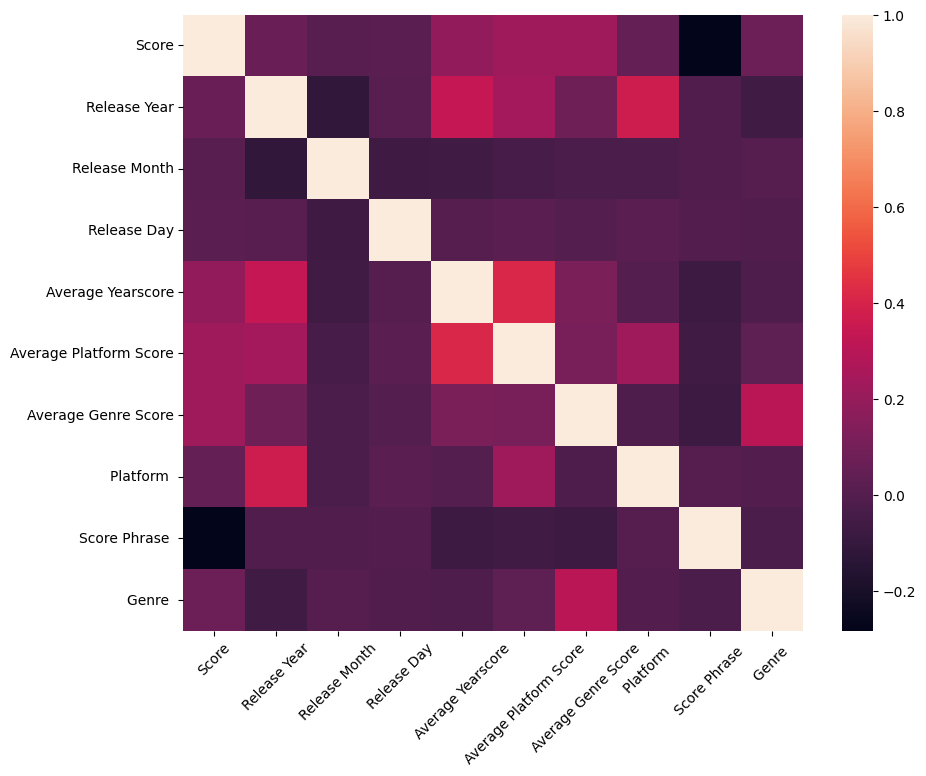

In [ ]:
df_numeric = df.select_dtypes(include=[np.number])
corr_matrix = df_numeric.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix)
#menghapus '_score' pada title
new_labels = [label.replace('_', ' ').replace('code', '').title() for label in df_numeric.columns]
plt.xticks(ticks=np.arange(0.5, len(df_numeric.columns)), labels=new_labels, rotation=45)
plt.yticks(ticks=np.arange(0.5, len(df_numeric.columns)), labels=new_labels, rotation=0)
plt.show()

  <p align="justify">Heatmap ini menunjukkan korelasi antara setiap pasangan kolom numerik dalam dataframe. Warna yang lebih terang menunjukkan korelasi positif yang kuat (yaitu, ketika nilai satu kolom meningkat, nilai kolom lain juga cenderung meningkat), sedangkan warna yang lebih gelap menunjukkan korelasi negatif yang kuat (yaitu, ketika nilai satu kolom meningkat, nilai kolom lain cenderung menurun).

  <p align="justify">Misalnya, kita dapat melihat bahwa **score** memiliki korelasi positif yang kuat dengan **average_yearscore**, **average_platform_score**, dan **average_genre_score**. Ini berarti bahwa game dengan skor yang lebih tinggi cenderung memiliki skor rata-rata yang lebih tinggi di tahun, platform, dan genre mereka.

  <p align="justify">Sebaliknya, **score** memiliki korelasi negatif dengan **score_phrase_code**. Ini berarti bahwa game dengan skor yang lebih tinggi cenderung memiliki kode frase skor yang lebih rendah. Ini mungkin karena kode frase skor diberikan dalam urutan terbalik (misalnya, "Masterpiece" mungkin memiliki kode 0, sementara "Terrible" mungkin memiliki kode 10).

### **Jumlah Game Rilis Tiap Tahun**

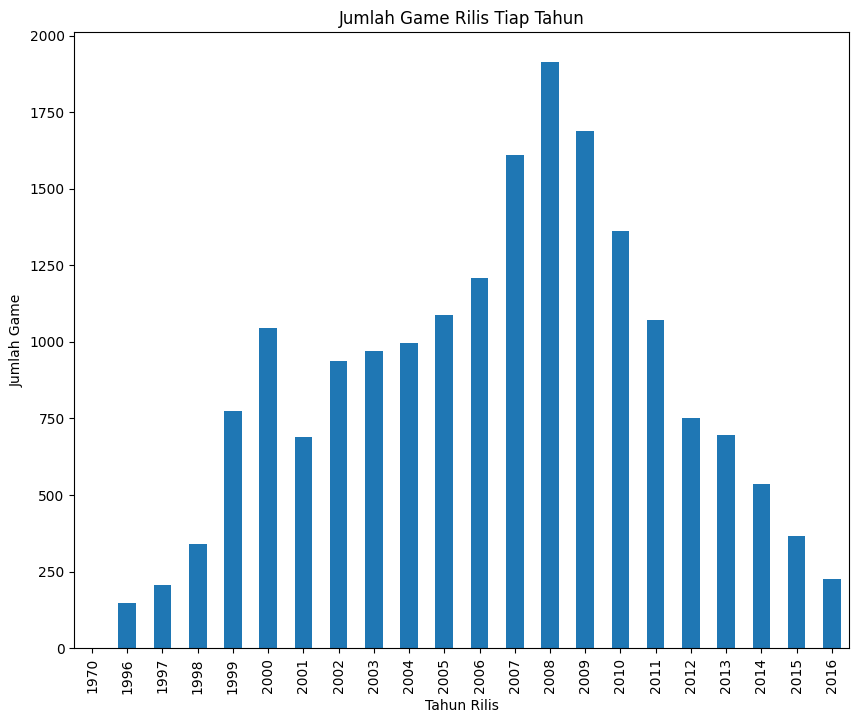

In [ ]:
plt.figure(figsize=(10,8))
df.groupby(by = 'release_year').title.count().plot(kind = 'bar')
plt.xlabel('Tahun Rilis')
plt.ylabel('Jumlah Game')
plt.title('Jumlah Game Rilis Tiap Tahun')
plt.show()

<p align="justify">Jumlah rilis game umumnya meningkat dari tahun 1996 hingga 2008. Hal ini bisa disebabkan oleh pertumbuhan industri video game selama periode ini, dengan platform dan teknologi baru yang memungkinkan produksi lebih banyak game.

<p align="justify">Puncak rilis game adalah pada tahun 2008, dengan 1915 game dirilis. Hal ini bisa disebabkan oleh berbagai faktor, seperti popularitas platform tertentu atau kesuksesan genre tertentu.

<p align="justify">Setelah tahun 2008, jumlah rilis game mulai menurun. Hal ini bisa disebabkan oleh jenuhnya pasar, perubahan preferensi konsumen, atau munculnya game mobile dan online.

<p align="justify">Jumlah rilis game turun secara signifikan pada tahun 2015 dan 2016. Hal ini bisa disebabkan oleh pergeseran di industri menuju game berkualitas tinggi yang lebih kompleks dan membutuhkan waktu lebih lama untuk dikembangkan.

<p align="justify">Ada outlier pada tahun 1970 dengan hanya 1 game yang dirilis. Ini bisa menjadi kesalahan entri data, karena industri video game belum aktif secara komersial pada saat itu.

### **Distribusi Skor Game**

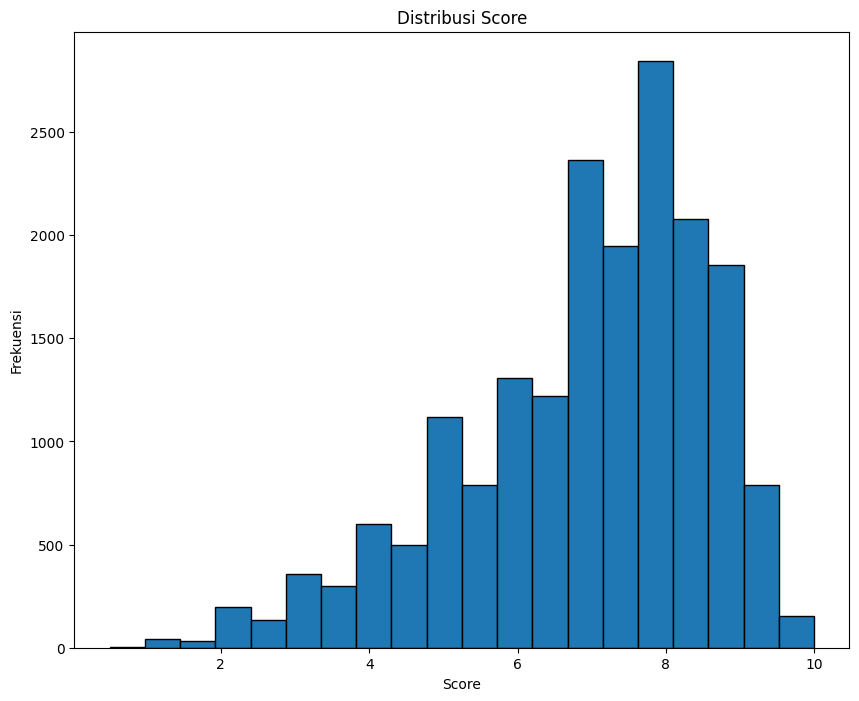

In [ ]:
# Distribusi Skor Game
plt.figure(figsize=(10,8))
plt.hist(df['score'], bins=20, edgecolor='black')
plt.title('Distribusi Score')
plt.xlabel('Score')
plt.ylabel('Frekuensi')
plt.show()

<p align="justify">Histogram ini menunjukkan distribusi skor game. Dari visualisasi ini, kita dapat melihat bahwa sebagian besar game memiliki skor antara sekitar 6 dan 8. Ada juga beberapa game dengan skor sangat rendah (di bawah 4) dan beberapa dengan skor sangat tinggi (di atas 9).

<p align="justify">Distribusi ini tampaknya miring ke kiri, yang berarti bahwa ada lebih banyak game dengan skor yang lebih tinggi daripada skor yang lebih rendah. Ini bisa menunjukkan bahwa peninjau game cenderung memberikan skor yang relatif tinggi.

<p align="justify">Namun, perlu diingat bahwa ini hanya interpretasi awal dan mungkin perlu diperiksa lebih lanjut. Misalnya, mungkin ada faktor lain yang mempengaruhi distribusi skor ini, seperti bias dalam peninjauan game atau perbedaan dalam jumlah game yang dirilis setiap tahun.

### **Tren Skor Game Setiap Tahun**

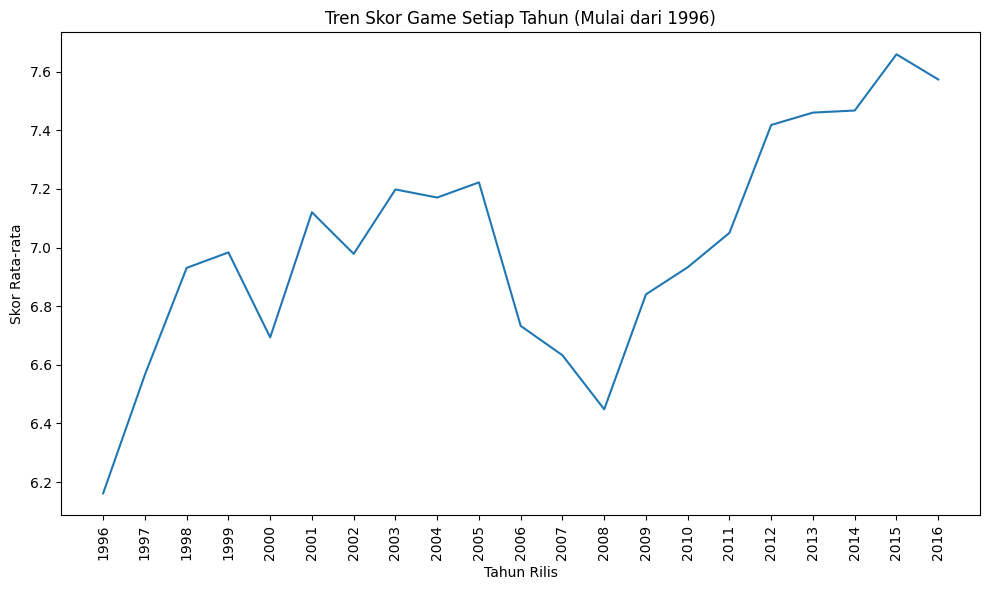

In [ ]:
plt.figure(figsize=(10,6))
#memulai dari 1996, karena hanya ada 1 game yang rilis sebelum 1996
df[df['release_year'] >= 1996].groupby('release_year')['score'].mean().plot()
plt.title('Tren Skor Game Setiap Tahun (Mulai dari 1996)')
plt.xlabel('Tahun Rilis')
plt.ylabel('Skor Rata-rata')
plt.xticks(ticks=np.arange(1996, df['release_year'].max()+1, 1), rotation=90)
plt.tight_layout()

<p align="justify">Plot garis ini menunjukkan tren skor rata-rata game sepanjang waktu, dimulai dari tahun 1996. Sumbu x mewakili tahun rilis game, dan sumbu y mewakili skor rata-rata game yang dirilis pada tahun tersebut.

<p align="justify">Secara umum, skor rata-rata game tampaknya mengalami penurunan sejak tahun 1996 hingga sekitar tahun 2006. Ini mungkin menunjukkan bahwa kualitas game secara keseluruhan menurun selama periode ini, atau mungkin standar penilaian game menjadi lebih ketat.

<p align="justify">Setelah tahun 2006, skor rata-rata game tampaknya stabil dan cenderung sedikit meningkat. Ini mungkin menunjukkan bahwa kualitas game mulai membaik, atau mungkin industri game mulai memahami lebih baik apa yang diinginkan oleh pemain dan kritikus.

<p align="justify">Ada beberapa penurunan dan kenaikan tajam dalam skor rata-rata dari tahun ke tahun. Ini mungkin disebabkan oleh rilis beberapa game dengan skor tinggi atau rendah yang cukup untuk mempengaruhi rata-rata secara signifikan.

<p align="justify">Meskipun ada beberapa fluktuasi, skor rata-rata game tampaknya berkisar antara sekitar 6 dan 7. Ini menunjukkan bahwa sebagian besar game menerima skor yang cukup baik, dengan sedikit game yang menerima skor sangat tinggi atau sangat rendah.

### **Distribusi Score Phrase**

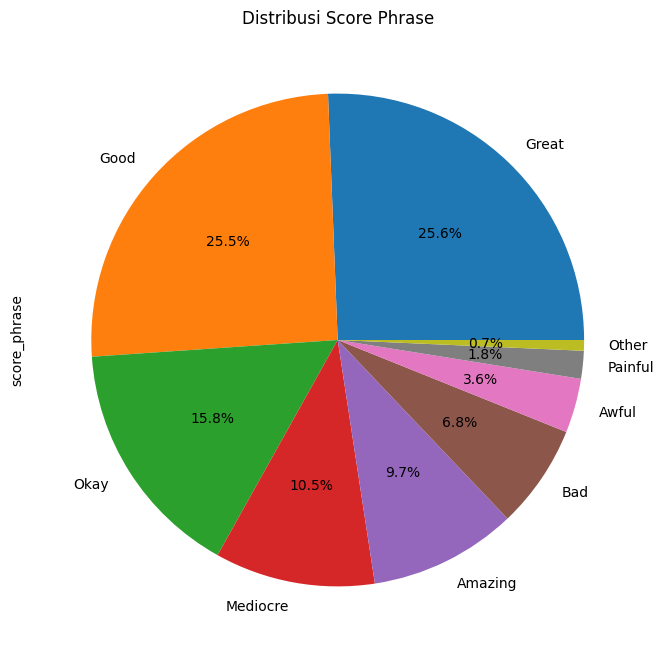

In [ ]:
# menghitung persen setiap score phrase
score_phrase_percent = df['score_phrase'].value_counts(normalize=True) * 100
# cari score phrase yang sedikit
small_percent_phrases = score_phrase_percent[score_phrase_percent < 1.8].index
#jadikan score phrase menjadi 'other'
df['score_phrase'] = df['score_phrase'].replace(small_percent_phrases, 'Other')

plt.figure(figsize=(10,8))
df['score_phrase'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribusi Score Phrase')
plt.show()

<p align="justify">Pie chart ini dapat memberikan gambaran tentang distribusi berbagai score phrase dalam data.

<p align="justify">Dominasi Score Phrase: 'Great' dan 'Good' adalah score phrase yang paling dominan dalam data ini, masing-masing dengan 4773 dan 4741 entri. Ini menunjukkan bahwa sebagian besar game dalam data ini mendapatkan penilaian yang baik.

<p align="justify">Score Phrase yang Kurang Umum: Di sisi lain, 'Painful' dan 'Other' adalah score phrase yang paling jarang muncul dalam data ini, masing-masing dengan 340 dan 130 entri. Ini menunjukkan bahwa hanya sedikit game yang mendapatkan penilaian rendah atau penilaian yang sangat buruk.

<p align="justify"><p align="justify">Varietas Score Phrase: Ada total 9 score phrase yang berbeda dalam data ini, termasuk kategori 'Other' yang mencakup score phrase dengan persentase kurang dari 1.8%. Ini menunjukkan bahwa ada variasi yang cukup besar dalam penilaian game dalam data ini.

### **Rata-rata Skor Genre**

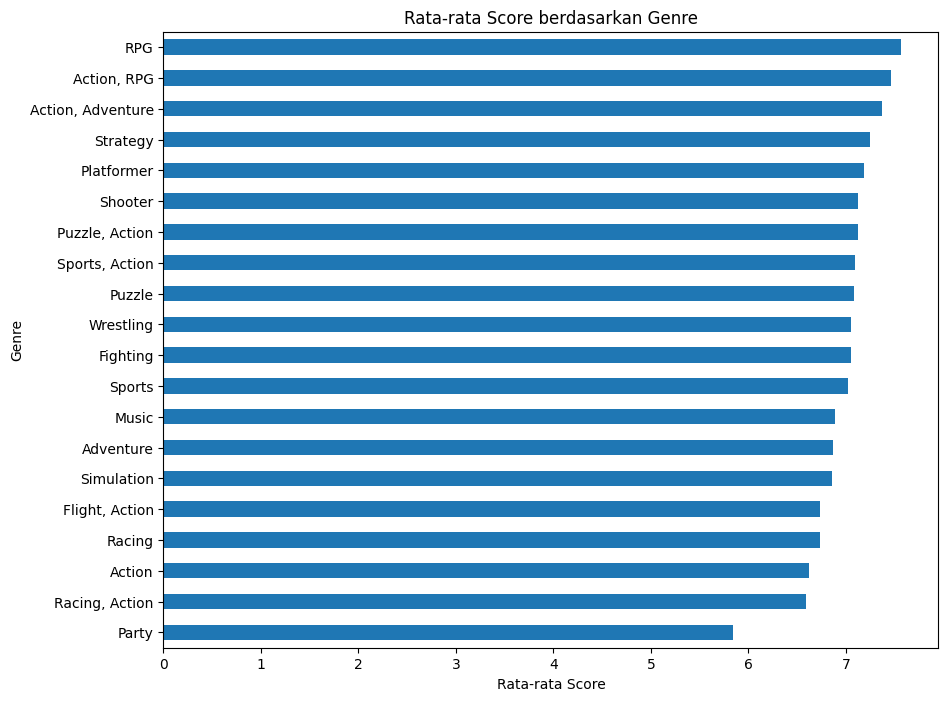

In [ ]:
# Mencari top 20 genre
top_genres = df['genre'].value_counts().index[:20]

# Filter dataframe untuk hanya memasukan data top_genre
df_top_genres = df[df['genre'].isin(top_genres)]

plt.figure(figsize=(10,8))
df_top_genres.groupby('genre')['score'].mean().sort_values().plot(kind='barh')
plt.title('Rata-rata Score berdasarkan Genre')
plt.xlabel('Rata-rata Score')
plt.ylabel('Genre')
plt.show()

<p align="justify">Dari visualisasi bar plot dari rata-rata skor berdasarkan genre untuk 20 genre teratas, kita dapat membuat beberapa pengamatan:

<p align="justify">Ada variasi yang signifikan dalam rata-rata skor di berbagai genre. Ini menunjukkan bahwa genre dari sebuah game mungkin memiliki dampak yang substansial pada skornya.

<p align="justify">Beberapa genre secara konsisten menerima skor tinggi. Genre-genre ini mungkin sangat disukai oleh reviewer, atau mereka mungkin genre yang sangat cocok untuk media video game.

<p align="justify">Sebaliknya, beberapa genre menerima skor rata-rata yang lebih rendah. Genre-genre ini mungkin kurang populer, atau mereka mungkin lebih sulit untuk dieksekusi dengan baik dalam format video game.

<p align="justify">Perbedaan dalam skor rata-rata antara genre dengan skor tertinggi dan genre ke-20 dengan skor tertinggi cukup besar. Ini menunjukkan bahwa ada berbagai kualitas dalam 20 genre teratas.

### **Top 10 Game Platform**

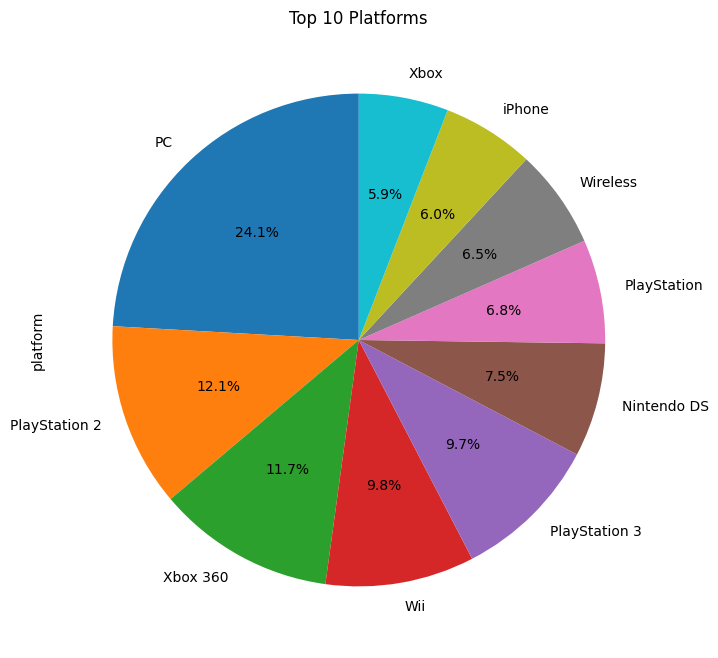

In [ ]:
plt.figure(figsize=(10,8))
df['platform'].value_counts().head(10).plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Top 10 Platforms')
plt.show()

<p align = "justify">PC adalah platform yang paling populer: Dengan 3370 game, PC adalah platform dengan jumlah game terbanyak dalam dataset ini. Hal ini bisa disebabkan oleh fleksibilitas dan aksesibilitas platform PC, yang memungkinkan berbagai jenis game dikembangkan dan dimainkan.

<p align = "justify">PlayStation dan Xbox juga populer: PlayStation 2, Xbox 360, dan PlayStation 3 juga memiliki jumlah game yang signifikan, menunjukkan popularitas mereka di antara para gamer dan pengembang.

<p align = "justify">Permainan mobile sedang naik daun: Kehadiran Wireless dan iPhone di 10 besar menunjukkan popularitas yang meningkat dari permainan mobile. Seiring smartphone menjadi lebih kuat dan luas, kita dapat mengharapkan lebih banyak game yang dikembangkan untuk platform ini.

## **Verify** **Data** **Quality**

####Missing Values


In [ ]:
df.isnull().sum()

title                      0
score                      0
score_phrase               0
platform                   0
genre                     36
release_year               0
release_month              0
release_day                0
average_yearscore          0
average_platform_score     0
average_genre_score       36
platform_code              0
score_phrase_code          0
genre_code                36
dtype: int64

<p align="justify">Untuk mencari nilai yang hilang atau missing values, kita menggunakan fungsi isnull().sum() pada dataframe. Fungsi isnull() akan menghasilkan dataframe yang sama tetapi dengan nilai boolean, True jika data tersebut adalah nilai yang hilang dan False jika bukan. Kemudian, fungsi sum() digunakan untuk menjumlahkan semua nilai True (yang dianggap sebagai 1) untuk setiap kolom.

<p align="justify">Dari hasil tersebut, kita dapat melihat bahwa kolom genre, average_genre_score, dan genre_code masing-masing memiliki 36 nilai yang hilang.

####Outlier Values


In [ ]:
#Memilih kolom numerikal
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
outliers = {}
# Untuk setiap koom numerikal, hitung Q1, Q3, dan IQR lalu hitung ouitliernya
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers[col] = ((df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR))).sum()
outliers

{'score': 391,
 'release_year': 1,
 'release_month': 0,
 'release_day': 0,
 'average_yearscore': 1,
 'average_platform_score': 105,
 'average_genre_score': 428,
 'platform_code': 50,
 'score_phrase_code': 0,
 'genre_code': 0}

<p align="justify">Untuk mencari outlier, kita menggunakan metode IQR (Interquartile Range). Pertama, kita menghitung Q1 (kuartil pertama) dan Q3 (kuartil ketiga) dari data. Kemudian, kita menghitung IQR, yang adalah perbedaan antara Q3 dan Q1. Setelah itu, kita mencari data yang berada di luar rentang [Q1-1.5IQR, Q3+1.5IQR]. Data yang berada di luar rentang ini dianggap sebagai outlier.

<p align="justify">Data diatas menunjukan bahwa kolom 'score', 'average_platform_score', 'average_genre_score', dan 'platform_code' memiliki outlier. Kolom lainnya tidak memiliki outlier atau jumlahnya sangat kecil.



####Duplicate Values


In [ ]:
df.duplicated().sum()

48

<p align="justify">Berikutnya, mari kita periksa apakah ada baris duplikat dalam data.Untuk mencari baris duplikat, kita menggunakan fungsi duplicated().sum() pada dataframe. Fungsi duplicated() akan menghasilkan Series boolean, dengan True untuk setiap baris yang merupakan duplikat dari baris lain, dan False sebaliknya. Kemudian, fungsi sum() digunakan untuk menjumlahkan semua nilai True (yang dianggap sebagai 1).

<p align="justify">Dari hasil tersebut, kita dapat melihat bahwa ada 48 baris duplikat dalam data.

####Inconsistent Values (Noise)


In [ ]:
# Skor yang diluar jangkauan(kurang dari 0, lebih dari 10)
out_of_range_scores = df[(df['score'] > 10) | (df['score'] < 0)]
print("Skor yang diluar jangkauan(kurang dari 0, lebih dari 10)):")
print(out_of_range_scores)

# Tahun rilis yang diluar jangkau(sebelum 1970, setelah 2016)
out_of_range_years = df[(df['release_year'] > 2016) | (df['release_year'] < 1970)]
print("\nTahun rilis yang diluar jangkau(sebelum 1970, setelah 2016):")
print(out_of_range_years)

# Platform dan genre yang muncul kurang dari 3 kali
rare_platforms = df['platform'].value_counts()[df['platform'].value_counts() < 3]
print("\nPlatform yang muncul kurang dari 3 kali:")
print(rare_platforms)

rare_genres = df['genre'].value_counts()[df['genre'].value_counts() < 3]
print("\nGenres yang muncul kurang dari 3 kali:")
print(rare_genres)

Skor yang diluar jangkauan(kurang dari 0, lebih dari 10)):
Empty DataFrame
Columns: [title, score, score_phrase, platform, genre, release_year, release_month, release_day, average_yearscore, average_platform_score, average_genre_score, platform_code, score_phrase_code, genre_code]
Index: []

Tahun rilis yang diluar jangkau(sebelum 1970, setelah 2016):
Empty DataFrame
Columns: [title, score, score_phrase, platform, genre, release_year, release_month, release_day, average_yearscore, average_platform_score, average_genre_score, platform_code, score_phrase_code, genre_code]
Index: []

Platform yang muncul kurang dari 3 kali:
Atari 5200             2
New Nintendo 3DS       2
Vectrex                2
Dreamcast VMU          1
Windows Surface        1
Sega CD                1
WonderSwan Color       1
Ouya                   1
Web Games              1
Pocket PC              1
SteamOS                1
DVD / HD Video Game    1
Name: platform, dtype: int64

Genres yang muncul kurang dari 3 kali:
Ed

<p align="justify">Kode di atas mencari nilai yang tidak konsisten atau noise dalam data. Berikut adalah penjelasan lengkap dari hasil kode tersebut:

<p align="justify">out_of_range_scores = df1[(df1['score'] > 10) | (df1['score'] < 0)] : Kode ini mencari skor yang lebih besar dari 10 atau lebih kecil dari 0. Jika ada skor seperti itu, mereka akan dianggap sebagai noise karena skor seharusnya berada dalam rentang 0-10.

<p align="justify">out_of_range_years = df1[(df1['release_year'] > 2022) | (df1['release_year'] < 1950)] : Kode ini mencari tahun rilis yang lebih besar dari tahun saat ini (2022) atau lebih kecil dari tahun tertentu (1950). Jika ada tahun rilis seperti itu, mereka akan dianggap sebagai noise karena tahun rilis seharusnya berada dalam rentang yang masuk akal (misalnya, 1950-2022).

<p align="justify">rare_platforms = df1['platform'].value_counts()[df1['platform'].value_counts() < 3] : Kode ini mencari platform yang muncul kurang dari 3 kali dalam data. Jika ada platform seperti itu, mereka mungkin dianggap sebagai noise karena platform tersebut mungkin tidak cukup populer atau mungkin ada kesalahan pengetikan dalam data.

<p align="justify">rare_genres = df1['genre'].value_counts()[df1['genre'].value_counts() < 3] : Kode ini mencari genre yang muncul kurang dari 3 kali dalam data. Jika ada genre seperti itu, mereka mungkin dianggap sebagai noise karena genre tersebut mungkin tidak cukup populer atau mungkin ada kesalahan pengetikan dalam data

#**Data Cleaning**

###**Penanganan Missing Values**

#####**Pengecekkan Missing Values**

Mencari presenase data yang kosong pada setiap kolom

In [ ]:
print((df.isna().sum() / len(df)) * 100)

title                     0.000000
score                     0.000000
score_phrase              0.000000
platform                  0.000000
genre                     0.193289
release_year              0.000000
release_month             0.000000
release_day               0.000000
average_yearscore         0.000000
average_platform_score    0.000000
average_genre_score       0.193289
platform_code             0.000000
score_phrase_code         0.000000
genre_code                0.193289
dtype: float64


Nilai kosong pada kolom 'genre'

In [ ]:
df[df['genre'].isnull()]

,title,score,score_phrase,platform,genre,release_year,release_month,release_day,average_yearscore,average_platform_score,average_genre_score,platform_code,score_phrase_code,genre_code
1042,Critter Crunch,9.0,Amazing,Wireless,NaN,2007,9,13,6.632547,7.177363,NaN,50,0,NaN
3944,Impossible Road,8.4,Great,iPhone,NaN,2013,5,31,7.460489,7.288005,NaN,57,5,NaN
5312,Duke Nukem Arena,8.0,Great,Wireless,NaN,2007,6,15,6.632547,7.177363,NaN,50,5,NaN
5362,Eyegore's Eye Blast,8.0,Great,iPhone,NaN,2009,10,5,6.840368,7.288005,NaN,57,5,NaN
5686,Land-a Panda,8.0,Great,iPhone,NaN,2011,3,14,7.050326,7.288005,NaN,57,5,NaN
5708,Liqua Pop,8.0,Great,iPhone,NaN,2011,3,18,7.050326,7.288005,NaN,57,5,NaN
5900,Nancy Drew: The Haunting of Castle Malloy,8.0,Great,PC,NaN,2008,10,8,6.448146,7.147359,NaN,29,5,NaN
6348,The Hero,8.0,Great,iPhone,NaN,2010,3,19,6.932869,7.288005,NaN,57,5,NaN
6349,The Horrible Vikings,8.0,Great,iPhone,NaN,2010,1,22,6.932869,7.288005,NaN,57,5,NaN
7158,Heavy Mach,7.8,Good,iPhone,NaN,2009,3,5,6.840368,7.288005,NaN,57,4,NaN


Nilai kosong pada kolom 'average_genre_score'

In [ ]:
df[df['average_genre_score'].isnull()]

,title,score,score_phrase,platform,genre,release_year,release_month,release_day,average_yearscore,average_platform_score,average_genre_score,platform_code,score_phrase_code,genre_code
1042,Critter Crunch,9.0,Amazing,Wireless,NaN,2007,9,13,6.632547,7.177363,NaN,50,0,NaN
3944,Impossible Road,8.4,Great,iPhone,NaN,2013,5,31,7.460489,7.288005,NaN,57,5,NaN
5312,Duke Nukem Arena,8.0,Great,Wireless,NaN,2007,6,15,6.632547,7.177363,NaN,50,5,NaN
5362,Eyegore's Eye Blast,8.0,Great,iPhone,NaN,2009,10,5,6.840368,7.288005,NaN,57,5,NaN
5686,Land-a Panda,8.0,Great,iPhone,NaN,2011,3,14,7.050326,7.288005,NaN,57,5,NaN
5708,Liqua Pop,8.0,Great,iPhone,NaN,2011,3,18,7.050326,7.288005,NaN,57,5,NaN
5900,Nancy Drew: The Haunting of Castle Malloy,8.0,Great,PC,NaN,2008,10,8,6.448146,7.147359,NaN,29,5,NaN
6348,The Hero,8.0,Great,iPhone,NaN,2010,3,19,6.932869,7.288005,NaN,57,5,NaN
6349,The Horrible Vikings,8.0,Great,iPhone,NaN,2010,1,22,6.932869,7.288005,NaN,57,5,NaN
7158,Heavy Mach,7.8,Good,iPhone,NaN,2009,3,5,6.840368,7.288005,NaN,57,4,NaN


Nilai kosong pada kolom 'genre_code'

In [ ]:
df[df['genre_code'].isnull()]

,title,score,score_phrase,platform,genre,release_year,release_month,release_day,average_yearscore,average_platform_score,average_genre_score,platform_code,score_phrase_code,genre_code
1042,Critter Crunch,9.0,Amazing,Wireless,NaN,2007,9,13,6.632547,7.177363,NaN,50,0,NaN
3944,Impossible Road,8.4,Great,iPhone,NaN,2013,5,31,7.460489,7.288005,NaN,57,5,NaN
5312,Duke Nukem Arena,8.0,Great,Wireless,NaN,2007,6,15,6.632547,7.177363,NaN,50,5,NaN
5362,Eyegore's Eye Blast,8.0,Great,iPhone,NaN,2009,10,5,6.840368,7.288005,NaN,57,5,NaN
5686,Land-a Panda,8.0,Great,iPhone,NaN,2011,3,14,7.050326,7.288005,NaN,57,5,NaN
5708,Liqua Pop,8.0,Great,iPhone,NaN,2011,3,18,7.050326,7.288005,NaN,57,5,NaN
5900,Nancy Drew: The Haunting of Castle Malloy,8.0,Great,PC,NaN,2008,10,8,6.448146,7.147359,NaN,29,5,NaN
6348,The Hero,8.0,Great,iPhone,NaN,2010,3,19,6.932869,7.288005,NaN,57,5,NaN
6349,The Horrible Vikings,8.0,Great,iPhone,NaN,2010,1,22,6.932869,7.288005,NaN,57,5,NaN
7158,Heavy Mach,7.8,Good,iPhone,NaN,2009,3,5,6.840368,7.288005,NaN,57,4,NaN


#####**Hapus Missing Values**

Karena tidak ada kolom memiliki presenase nilai kosong yang lebih dari 70%, maka tidak ada kolom yang perlu dihapus.

#####**Imputasi Missing Values**

Untuk ketiga kolom tersebut, perlu dilakukan imputasi karena merupakan fitur yang relevan dalam analisis ini dan jumlah missing valuesnya < 70%. Imputasi dilakukan menggunakan nilai analisis statistik kolom-kolom.

In [ ]:
df['genre'].dropna().describe()

count      18589
unique       112
top       Action
freq        3797
Name: genre, dtype: object

<p alight ="justify">Kita dapat menggunakan modus dari kolom 'genre' untuk imputasi nilai kosong tersebut. Nilai modus digunakan karena termasuk kolom kategorikal (tidak bisa dicari mean, median, dan kuartil)

In [ ]:
df['genre'] = df['genre'].fillna(df['genre'].mode()[0])

Lakukan hal yang sama pada kolom lainnya:

In [ ]:
df['average_genre_score'].dropna().describe()

count    18589.000000
mean         6.950853
std          0.378855
min          2.000000
25%          6.626679
50%          7.025209
75%          7.127888
max          9.500000
Name: average_genre_score, dtype: float64

Imputasi yang dilakukan dengan kolom 'average_genre_score' akan menggunakan mean dari kolom untuk imputasi nilai.

In [ ]:
df['average_genre_score'] = df['average_genre_score'].fillna(df['average_genre_score'].dropna().mean())

Sama halnya dengan kolom 'genre_code'

In [ ]:
df['genre_code'].dropna().describe()

count    18589.000000
mean        52.346549
std         39.347169
min          0.000000
25%          2.000000
50%         68.000000
75%         86.000000
max        111.000000
Name: genre_code, dtype: float64

In [ ]:
df['genre_code'] = df['genre_code'].fillna(df['genre_code'].dropna().mean())

#####**Pengecekkan Ulang**

In [ ]:
pd.DataFrame(df.isna().sum() / len(df) * 100, columns=['Null Ratio %'])

,Null Ratio %
title,0.0
score,0.0
score_phrase,0.0
platform,0.0
genre,0.0
release_year,0.0
release_month,0.0
release_day,0.0
average_yearscore,0.0
average_platform_score,0.0


Dapat dilihat telah tidak ada kolom yang memiliki nilai kosong

###**Penanganan Duplicated Values**

#####**Pengecekkan Nilai Duplikat**

Untuk mencari nilai yang duplikat dapat melakukan

In [ ]:
df[df.duplicated()]

,title,score,score_phrase,platform,genre,release_year,release_month,release_day,average_yearscore,average_platform_score,average_genre_score,platform_code,score_phrase_code,genre_code
174,Call of Duty: Modern Warfare 2 (Hardened Edition),9.5,Amazing,PlayStation 3,Shooter,2009,11,10,6.840368,7.189159,7.127888,32,0,86.0
1661,Steel Talons,9.0,Amazing,Lynx,"Flight, Action",1999,7,6,6.983484,7.134146,6.731200,15,0,44.0
1834,WipEout XL,9.0,Amazing,PlayStation,Racing,1996,11,26,6.161745,6.582458,6.730619,30,0,80.0
2265,Need for Speed Underground,8.8,Great,GameCube,Racing,2003,11,14,7.198246,7.042436,6.730619,12,5,80.0
2541,Scarface: The World is Yours,8.7,Great,PC,Action,2006,10,6,6.732864,7.147359,6.626679,29,5,0.0
2593,Tobal No. 1,8.7,Great,PlayStation,Fighting,1996,11,26,6.161745,6.582458,7.058135,30,5,37.0
2985,Dr. Muto,8.5,Great,Xbox,Platformer,2002,11,11,6.978526,7.205603,7.186513,53,5,63.0
3082,Final Fantasy I & II: Dawn of Souls,8.5,Great,Game Boy Advance,"RPG, Compilation",2004,11,30,7.170712,6.626645,7.875000,9,5,77.0
3668,The Sims,8.5,Great,Xbox,Simulation,2003,3,24,7.198246,7.205603,6.858906,53,5,91.0
5507,Guitar Hero On Tour: Decades (Game Only Edition),8.0,Great,Nintendo DS,Music,2008,11,17,6.448146,6.286986,6.894070,26,5,51.0


#####**Hapus Nilai Duplikat**

Untuk menghaus nilai yang duplikasi adalaha sebagai berikut

In [ ]:
df = df.drop_duplicates()

#####**Pengecekkan Ulang**

In [ ]:
pd.DataFrame(df[df.duplicated()])

,title,score,score_phrase,platform,genre,release_year,release_month,release_day,average_yearscore,average_platform_score,average_genre_score,platform_code,score_phrase_code,genre_code


Nilai yang duplikat telah dihapus

###**Penanganan Outliers**

#####**Pengecekkan Outliers**

In [6]:
results = []

cols = df.select_dtypes(include=['float64', 'int64'])

for col in cols:
  q1 = df[col].quantile(0.25)
  q3 = df[col].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5*iqr
  upper_bound = q3 + 1.5*iqr
  outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
  percent_outliers = (len(outliers)/len(df))*100
  results.append({'Kolom': col, 'Persentase Outliers': percent_outliers})

# Dataframe dari list hasil
results_df = pd.DataFrame(results)
results_df.set_index('Kolom', inplace=True)
results_df = results_df.rename_axis(None, axis=0).rename_axis('Kolom', axis=1)

# Tampilkan dataframe
display(results_df)

Kolom,Persentase Outliers
score,2.099329
release_year,0.005369
release_month,0.000000
release_day,0.000000
average_yearscore,0.005369
average_platform_score,0.563758
average_genre_score,2.297987
platform_code,0.268456
score_phrase_code,0.000000
genre_code,0.000000


<p align="justify">Dalam analisis data kami, terlihat bahwa sebagian besar kolom menunjukkan persentase outlier yang cukup rendah, contohnya pada kolom 'score' di mana sekitar 2.1% data dapat dianggap sebagai outlier. Mengingat skor ini diberikan oleh IGN, yang cenderung memberikan skor ekstrem (baik sangat tinggi atau sangat rendah), kemungkinan besar nilai-nilai outlier ini merupakan variasi alami dalam dataset. Oleh karena itu, dapat disimpulkan bahwa tindakan penghapusan maupun imputasi outliers tidak diperlukan dalam konteks analisis ini. Hasil ini menunjukkan bahwa data yang ada cukup konsisten dan dapat diandalkan untuk tujuan analisis yang lebih lanjut.

#**Construct Data**

###**Melakukan Rekayasa Fitur (Feature Engineering)**

Kategorisasi berdasarkan bulan rilis ini membagi tahun menjadi empat kuartal (Q1, Q2, Q3, Q4) berdasarkan bulan:

Q1: Januari hingga Maret

Q2: April hingga Juni

Q3: Juli hingga September

Q4: Oktober hingga Desember

Kegunaan dari kategorisasi ini adalah untuk memudahkan analisis data berdasarkan periode waktu dalam setahun.

In [10]:
def categorize_month(month):
    if 1 <= month <= 3:
        return 'Q1'
    elif 4 <= month <= 6:
        return 'Q2'
    elif 7 <= month <= 9:
        return 'Q3'
    elif 10 <= month <= 12:
        return 'Q4'

df['ReleaseQuarter'] = df['release_month'].apply(categorize_month)

###**Pengecekkan Hasil**

In [13]:
df.head()

,title,score,score_phrase,platform,genre,release_year,release_month,release_day,average_yearscore,average_platform_score,average_genre_score,platform_code,score_phrase_code,genre_code,ReleaseQuarter
0,Checkered Flag,10.0,Masterpiece,Lynx,Racing,1999,7,6,6.983484,7.134146,6.730619,15,6,80.0,Q3
1,Chrono Trigger,10.0,Masterpiece,Wii,"Action, RPG",2011,5,25,7.050326,6.299268,7.464849,46,6,6.0,Q2
2,Dragon Warrior III,10.0,Masterpiece,Game Boy Color,RPG,2001,7,20,7.120494,6.193820,7.571429,10,6,75.0,Q3
3,Grand Theft Auto IV,10.0,Masterpiece,Xbox 360,"Action, Adventure",2008,4,25,6.448146,7.105334,7.371895,54,6,1.0,Q2
4,Grand Theft Auto IV,10.0,Masterpiece,PlayStation 3,"Action, Adventure",2008,4,25,6.448146,7.189159,7.371895,32,6,1.0,Q2


#**Data Reduction**

###**Mengurangi Fitur - Fitur Yang Kurang Relevan**

In [14]:
df_corr = df.corr(numeric_only=True)
px.imshow(df_corr)

In [15]:
df = df.drop(['release_day'], axis=1)

<p align="justify">Kolom "release_day" dihapus karena analisis data ini tidak memerlukan tingkat granularitas harian, namun lebih fokus pada tren bulanan atau tahunan untuk menghindari kompleksitas yang tidak diperlukan.

###**Pengecekkan Hasil**

In [16]:
df.head()

,title,score,score_phrase,platform,genre,release_year,release_month,average_yearscore,average_platform_score,average_genre_score,platform_code,score_phrase_code,genre_code,ReleaseQuarter
0,Checkered Flag,10.0,Masterpiece,Lynx,Racing,1999,7,6.983484,7.134146,6.730619,15,6,80.0,Q3
1,Chrono Trigger,10.0,Masterpiece,Wii,"Action, RPG",2011,5,7.050326,6.299268,7.464849,46,6,6.0,Q2
2,Dragon Warrior III,10.0,Masterpiece,Game Boy Color,RPG,2001,7,7.120494,6.193820,7.571429,10,6,75.0,Q3
3,Grand Theft Auto IV,10.0,Masterpiece,Xbox 360,"Action, Adventure",2008,4,6.448146,7.105334,7.371895,54,6,1.0,Q2
4,Grand Theft Auto IV,10.0,Masterpiece,PlayStation 3,"Action, Adventure",2008,4,6.448146,7.189159,7.371895,32,6,1.0,Q2


#**Data Transformation**

###**Mapping**

<p align="justify">Mapping dalam dataset, seperti pada kolom 'score_phrase_code', 'platform_code', dan 'genre_code', sudah ada. Oleh karena itu, tidak diperlukan mapping untuk kolom non-numerik tambahan. Namun, perlu dilakukan mapping ulang pada kolom 'score_phrase_code' karena kode-kode yang ada tidak sesuai, contohnya Masterpiece yang seharusnya bernilai 6, painful bernilai 9, dan unbearable bernilai 10, dan seterusnya.

In [19]:
score_phrase_mapping = {
    'Masterpiece': 10,
    'Amazing': 9,
    'Great': 8,
    'Good': 7,
    'Okay': 6,
    'Mediocre': 5,
    'Bad': 4,
    'Awful': 3,
    'Painful': 2,
    'Unbearable': 1,
    'Disaster': 0
}
df['score_phrase_code'] = df['score_phrase'].map(score_phrase_mapping)

In [22]:
df[['score_phrase', 'score_phrase_code']].drop_duplicates()

,score_phrase,score_phrase_code
0,Masterpiece,10
55,Amazing,9
1859,Great,8
6632,Good,7
11373,Okay,6
14318,Mediocre,5
16277,Bad,4
17546,Awful,3
18210,Painful,2
18550,Unbearable,1


###**Encoding**

<p align="justify">Tahap encoding ini digunakan untuk membuat variabel dummy atau one-hot encoding dari kolom-kolom kategorikal dalam DataFrame df, memungkinkan representasi yang lebih baik untuk analisis atau pemodelan data dengan algoritma yang memerlukan input numerik.

In [24]:
df = pd.get_dummies(df)

###**Pengecekkan Hasil**

In [25]:
df.head()

,score,release_year,release_month,average_yearscore,average_platform_score,average_genre_score,platform_code,score_phrase_code,genre_code,title_#IDARB,...,"genre_Strategy, RPG","genre_Strategy, Simulation",genre_Trivia,genre_Virtual Pet,genre_Wrestling,"genre_Wrestling, Simulation",ReleaseQuarter_Q1,ReleaseQuarter_Q2,ReleaseQuarter_Q3,ReleaseQuarter_Q4
0,10.0,1999,7,6.983484,7.134146,6.730619,15,10,80.0,0,...,0,0,0,0,0,0,0,0,1,0
1,10.0,2011,5,7.050326,6.299268,7.464849,46,10,6.0,0,...,0,0,0,0,0,0,0,1,0,0
2,10.0,2001,7,7.120494,6.193820,7.571429,10,10,75.0,0,...,0,0,0,0,0,0,0,0,1,0
3,10.0,2008,4,6.448146,7.105334,7.371895,54,10,1.0,0,...,0,0,0,0,0,0,0,1,0,0
4,10.0,2008,4,6.448146,7.189159,7.371895,32,10,1.0,0,...,0,0,0,0,0,0,0,1,0,0


#**Menyimpan DataFrame**

In [28]:
df.to_csv('Data_Cleaned.csv', index=False)